<a href="https://colab.research.google.com/github/despygurl/Tugas-Grup-DTS-Python-2021/blob/master/imdb_indo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Di bawah ini adalah proses analisa untuk file scraping kelompok kami dari Grup M. 

IMDB adalah suatu web yang memang berisi kumpulan data film dari banyak negara di dunia, salah satunya adalah negara kita, Indonesia. Kami mencoba mengambil data film Indonesia dari IMDB dengan teknik scraping web pada link [ini](https://www.imdb.com/search/title/?country_of_origin=id&ref_=tt_dt_dt).

Data IMDB ini berisi 5 kolom yakni kolom:
1.   Title
2.   Year
3.   Rating
4.   Director
5.   Stars





---



# **Persiapan Data**

Pada tahap ini, kita melakukan import library yang dibutuhkan untuk proses eksplorasi, analisa dan visualisasi data. Selanjutnya kita ambil data film scraping dari IMDB yang akan dianalisa.


In [ ]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Import data dan tampung dalam variabel imdb
df = pd.read_csv('https://raw.githubusercontent.com/despygurl/Tugas-Grup-DTS-Python-2021/master/imdb_indo.csv')

In [ ]:
# Menampilkan seluruh data imdb dalam satu dataframe
df

,title,year,rating,director,stars
0,Warkop DKI Reborn 3,2019,4.0,Rako Prijanto,"Aliando Syarief,Adipati Dolken,Randy Nidji"
1,Pintu Terlarang,2009,6.8,Joko Anwar,"Fachry Albar,Marsha Timothy,Ario Bayu"
2,What's Up with Cinta?,2002,7.7,Rudy Soedjarwo,"Dian Sastrowardoyo,Nicholas Saputra,Ladya Cheryl"
3,Anak Garuda,2020,8.7,Faozan Rizal,"Tissa Biani Azzahra,Violla Georgie,Ajil Ditto"
4,Tarung Sarung,2020,5.9,Archie Hekagery,"Panji Zoni,Yayan Ruhian,Maizura"
...,...,...,...,...,...
3279,Gundala,2019,6.3,Joko Anwar,"Abimana Aryasatya,Tara Basro,Bront Palarae"
3280,The Night Comes for Us,2018,7.0,Timo Tjahjanto,"Joe Taslim,Iko Uwais,Julie Estelle"
3281,Tersanjung: The Movie,2021,6.7,Pandu Adjisurya,"Clara Bernadeth,Giorgino Abraham,Kevin Ardillova"
3282,Impetigore,2019,6.7,Joko Anwar,"Tara Basro,Ario Bayu,Marissa Anita"


Selain menampilkan keseluruhan data, kita juga dapat melihat sebagian data, untuk itu kita gunakan fungsi `head()`. Secara default pandas akan menampilkan 5 data pertama dari dataframe.

In [ ]:
# Menampilkan 5 baris teratas
df.head()

,title,year,rating,director,stars
0,Warkop DKI Reborn 3,2019,4.0,Rako Prijanto,"Aliando Syarief,Adipati Dolken,Randy Nidji"
1,Pintu Terlarang,2009,6.8,Joko Anwar,"Fachry Albar,Marsha Timothy,Ario Bayu"
2,What's Up with Cinta?,2002,7.7,Rudy Soedjarwo,"Dian Sastrowardoyo,Nicholas Saputra,Ladya Cheryl"
3,Anak Garuda,2020,8.7,Faozan Rizal,"Tissa Biani Azzahra,Violla Georgie,Ajil Ditto"
4,Tarung Sarung,2020,5.9,Archie Hekagery,"Panji Zoni,Yayan Ruhian,Maizura"


Setelah menampilkan data, kita ingin melihat bentuk dari dataframe imdb. 
Untuk itu kita dapat memanfaatkan fungsi `shape()` dari pandas yang akan membantu kita menampilkan total baris dan total kolom yang ada pada dataframe ini.

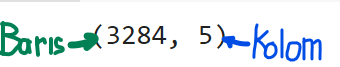

In [ ]:
# Menampilkan jumlah baris dan kolom pada dataframe imdb
df.shape

(3284, 5)

Kita juga dapat melihat informasi lebih lengkap terkait dataframe ini dengan memanfaatkan fungsi `info()`. 

Pandas akan memberi tahu keadaan dalam dataframe ini seperti jumlah row yang terisi di tiap kolom hingga tipe data tiap kolom.

In [ ]:
# Menampilkan informasi pada dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3284 entries, 0 to 3283
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     3284 non-null   object 
 1   year      3284 non-null   int64  
 2   rating    1547 non-null   float64
 3   director  3246 non-null   object 
 4   stars     3047 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 128.4+ KB


Lebih jauh lagi, kita dapat melihat rangkuman statistik deskriptif dari tiap kolom dalam dataframe yang memiliki nilai numerik dengan menggunakan `describe()`

In [ ]:
# Menampilkan rangkuman statistik
df.describe()

,year,rating
count,3284.000000,1547.000000
mean,2002.555725,6.280026
std,19.970347,1.397848
min,1926.000000,1.200000
25%,1990.000000,5.500000
50%,2011.000000,6.500000
75%,2017.000000,7.200000
max,2023.000000,9.800000




---



# **Eksplorasi dan Visualisasi Data**

Selanjutnya kita akan mulai proses eksplorasi dan visualisasi dataframe.

Seperti yang kita ketahui, dataframe ini terdiri dari 5 kolom utama; title, year, rating, director, dan stars.

In [ ]:
df.head()

,title,year,rating,director,stars
0,Warkop DKI Reborn 3,2019,4.0,Rako Prijanto,"Aliando Syarief,Adipati Dolken,Randy Nidji"
1,Pintu Terlarang,2009,6.8,Joko Anwar,"Fachry Albar,Marsha Timothy,Ario Bayu"
2,What's Up with Cinta?,2002,7.7,Rudy Soedjarwo,"Dian Sastrowardoyo,Nicholas Saputra,Ladya Cheryl"
3,Anak Garuda,2020,8.7,Faozan Rizal,"Tissa Biani Azzahra,Violla Georgie,Ajil Ditto"
4,Tarung Sarung,2020,5.9,Archie Hekagery,"Panji Zoni,Yayan Ruhian,Maizura"


Kolom stars berisi kumpulan artis yang memainkan tiap film. Namun seperti yang kita lihat, dalam satu kolom tersebut berisi lebih dari 1 nama sehingga berpotensi untuk menyulitkan eksplorasi, analisa dan visualisasi data.

Sehingga kita akan memisah tiap nama artis dalam satu kolom tersendiri hingga menghasilkan 3 kolom baru.

In [ ]:
df[['actor_1','actor_2','actor_3']] = df['stars'].str.split(',', expand=True)
df.head()

,title,year,rating,director,stars,actor_1,actor_2,actor_3
0,Warkop DKI Reborn 3,2019,4.0,Rako Prijanto,"Aliando Syarief,Adipati Dolken,Randy Nidji",Aliando Syarief,Adipati Dolken,Randy Nidji
1,Pintu Terlarang,2009,6.8,Joko Anwar,"Fachry Albar,Marsha Timothy,Ario Bayu",Fachry Albar,Marsha Timothy,Ario Bayu
2,What's Up with Cinta?,2002,7.7,Rudy Soedjarwo,"Dian Sastrowardoyo,Nicholas Saputra,Ladya Cheryl",Dian Sastrowardoyo,Nicholas Saputra,Ladya Cheryl
3,Anak Garuda,2020,8.7,Faozan Rizal,"Tissa Biani Azzahra,Violla Georgie,Ajil Ditto",Tissa Biani Azzahra,Violla Georgie,Ajil Ditto
4,Tarung Sarung,2020,5.9,Archie Hekagery,"Panji Zoni,Yayan Ruhian,Maizura",Panji Zoni,Yayan Ruhian,Maizura


Kita sudah membagi kolom untuk setiap nama artis, namun kita bisa lihat bahwa terdapat beberapa artis yang berakting dalam beberapa film. Karena itu kita ingin melihat kira-kira artis mana sajakah itu dan berapa film yang mereka perankan ya?

In [ ]:
# Most Productive Stars
pd.set_option('display.max_rows', None)
pd.Series(df[['actor_1', 'actor_2', 'actor_3']].values.ravel()).value_counts()

Zainal Abidin                         48
Reza Rahadian                         41
Barry Prima                           41
Hamid Arief                           36
Meriam Bellina                        34
Farouk Afero                          33
Vino G. Bastian                       31
Eva Arnaz                             31
Advent Bangun                         29
Adipati Dolken                        29
Tora Sudiro                           28
Aminah Cendrakasih                    26
Rano Karno                            25
Donny Alamsyah                        25
Abimana Aryasatya                     24
Pitradjaya Burnama                    24
Ringgo Agus Rahman                    23
Rachmat Hidayat                       23
Ario Bayu                             22
Suzzanna                              22
W.D. Mochtar                          22
Acha Septriasa                        21
Slamet Rahardjo                       21
Ayu Azhari                            20
Syaiful Halim   

Masih kurang jelas ya? Baiklah, mari kita melihat grafik di bawah ini.

Dari grafik di bawah kita bisa melihat beberapa nama familiar. Nama dengan jumlah film terbanyak jatuh pada aktor bernama Zainal Abidin. Sejumlah 48 film tercatat dalam portofolio film yang dibintanaktor ini.

Kemudian di nomor 2 dan 3 kita bisa melihat nama yang familiar bagi generasi kita. Aktor ternama Indonesia, Reza Rahadian mencatatkan namanya pada 41 film Indonesia yang dibintanginya. Jumlah film yang sama dicatatkan oleh aktor senior Indonesia lainnya yakni Barry Prima. 

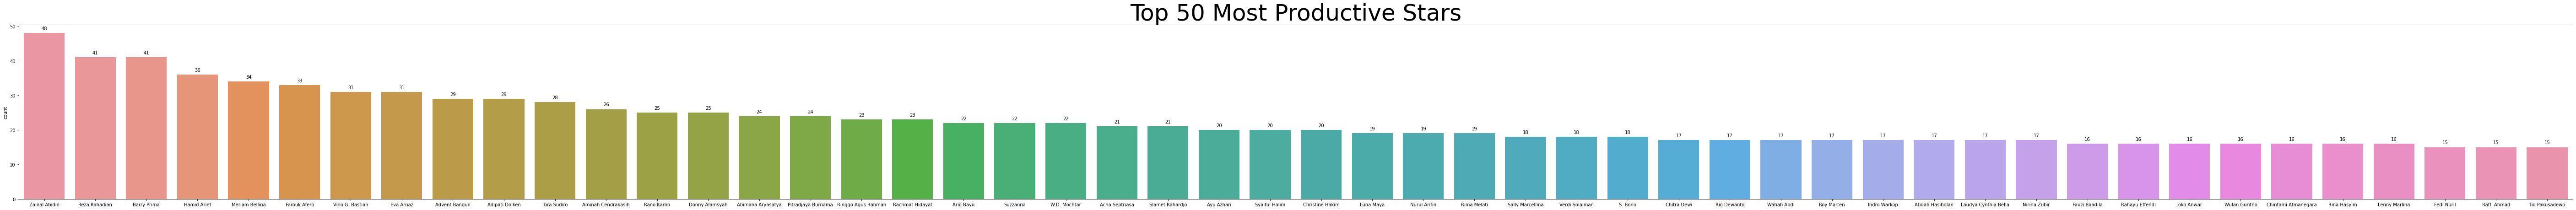

In [ ]:
plt.figure(figsize=(100,7))

data_x = pd.Series(df[['actor_1', 'actor_2', 'actor_3']].values.ravel())
stars = sns.countplot(x = data_x, 
                      order = data_x.value_counts().iloc[:50].index)

   
for i in stars.patches:
  stars.annotate(format(i.get_height()), (i.get_x() + i.get_width() / 2., i.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Top 50 Most Productive Stars',fontsize=50)

plt.show()

Artis-artis yang memerankan film ada begitu banyak ya? Memang ada banyak ya film Indonesia yang sudah diluncurkan? 

Dari grafik di bawah terlihat bahwa tahun 2018 merupakan tahun di mana para sineas film Indonesia sedang giat-giatnya membuat dan meluncurkan karyanya.

Sementara meski hanya 1 judul, kita perlu mengapresiasi bahwa ada film Indonesia yang diproduksi pada tahun 1926 dan tercatat di IMDB

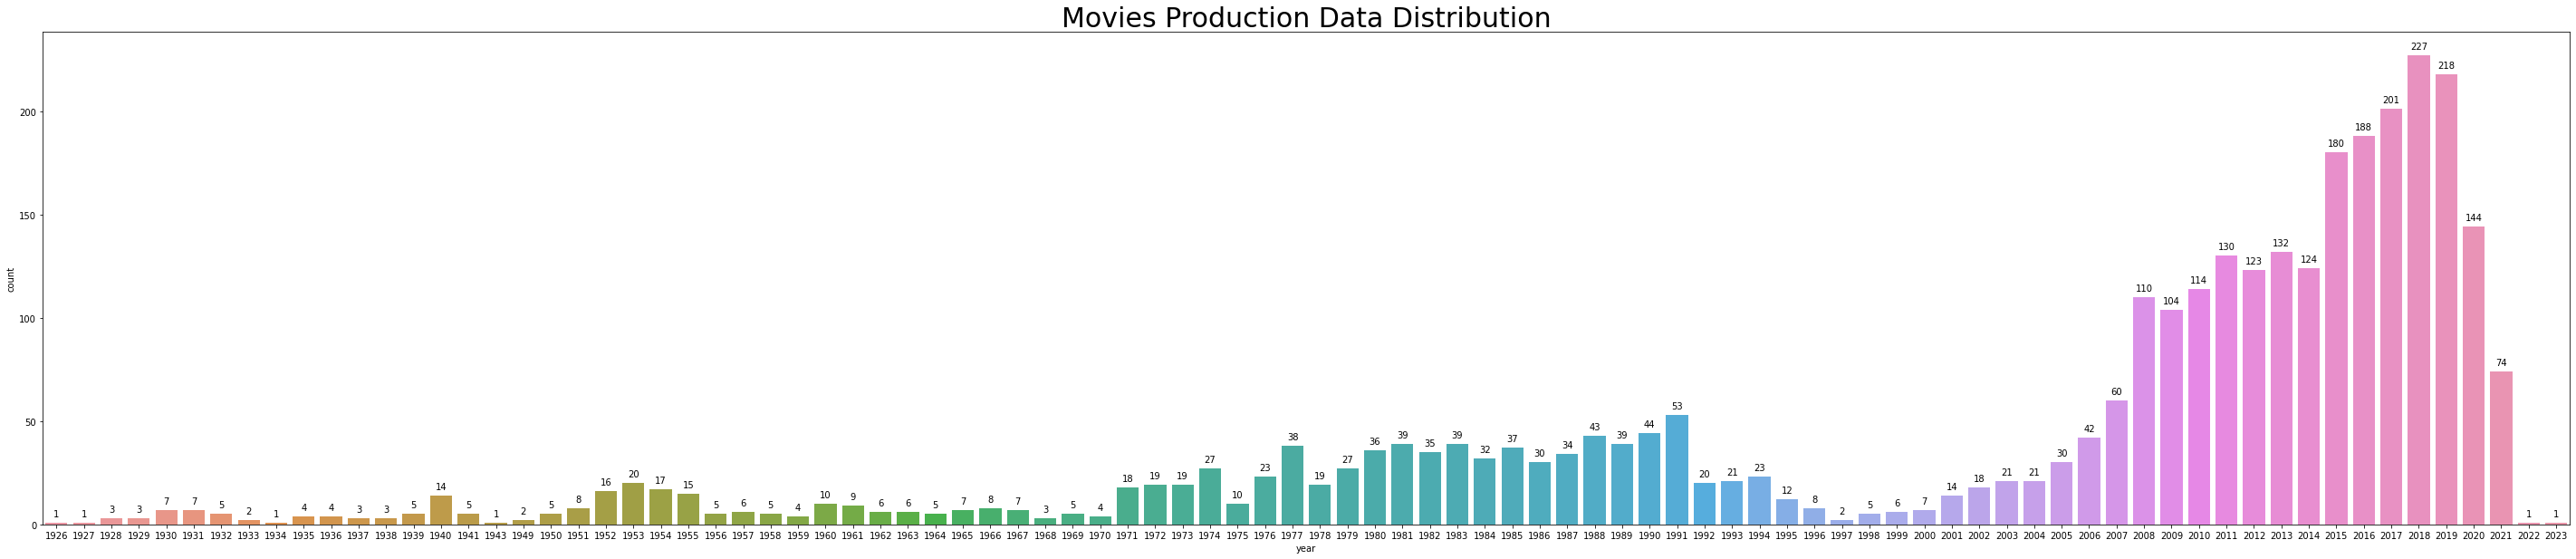

In [ ]:
plt.figure(figsize=(50,10))

data_x = df.year
movies_by_year = sns.countplot(x = data_x)

for i in movies_by_year.patches:
  movies_by_year.annotate(format(i.get_height()), (i.get_x() + i.get_width() / 2., i.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Movies Production Data Distribution', fontsize=30)

plt.show()

Wah banyak sekali ya? Kami se-Grup M bahkan belum lahir saat film Indonesia pertama diproduksi :(

By the way memang siapa saja ya sutradara yang paling banyak memproduksi film dari sekian banyak film yang kita lihat di grafik sebelumnya? 

Mari kita lihat 3 sutradara yang paling rajin memproduksi film Indonesia.

In [ ]:
# Top 3 Most Productive Directors
df['director'].value_counts().head(3)

Nayato Fio Nuala    73
Arizal              58
Hanung Bramantyo    38
Name: director, dtype: int64

Ternyata urutan pertama adalah **Nayato Fio Nuala**. Ada 73 film yang sudah beliau produksi. Benar-benar produktif ya. 

Wah apa saja ya film yang beliau produksi, mari kita simak pada tabel di bawah ini untuk lebih lengkapnya. Kalau sudah tau, catat ya. Siapa tau bisa jadi bahan tontonan sambil ngabuburit..

In [ ]:
df.loc[df.director == 'Nayato Fio Nuala', ['director','title','year','rating']].sort_values(by=['rating'], ascending=False)

,director,title,year,rating
86,Nayato Fio Nuala,Wengi: Anak Mayit,2018,8.7
224,Nayato Fio Nuala,Heart 2 Heart,2010,8.4
2718,Nayato Fio Nuala,Pocong Minta Kawin,2011,7.1
2280,Nayato Fio Nuala,Gaby dan Lagunya,2010,6.9
212,Nayato Fio Nuala,3600 Detik,2014,6.6
3191,Nayato Fio Nuala,18++: Forever Love,2012,6.6
2682,Nayato Fio Nuala,Belum Cukup Umur,2010,6.4
2447,Nayato Fio Nuala,Seandainya,2012,6.3
2670,Nayato Fio Nuala,The Butterfly,2007,6.3
376,Nayato Fio Nuala,First Love,2006,6.3


Mari kita lihat juga kira-kira beliau se-produktif apa ya? Apakah beliau rajin membuat film setiap tahun? Tahun apa beliau paling banyak membuat film? 

Dari grafik ini terlihat bahwa Nayato Fio Nuala memang adalah sutradara yang sangat produktif. Sejak tahun 2005, karya beliau tercatat di IMDB dan konsisten tercatat tiap tahunnya hingga tahun 2018. 

Tahun 2011 merupakan tahun paling produktif bagi Nayato. Terdapat 14 judul film yang tercatat di IMDB diproduksi oleh beliau di tahun tersebut. Sebaliknya, tahun 2015 hanya tercatat 1 buah judul film beliau di IMDB. 

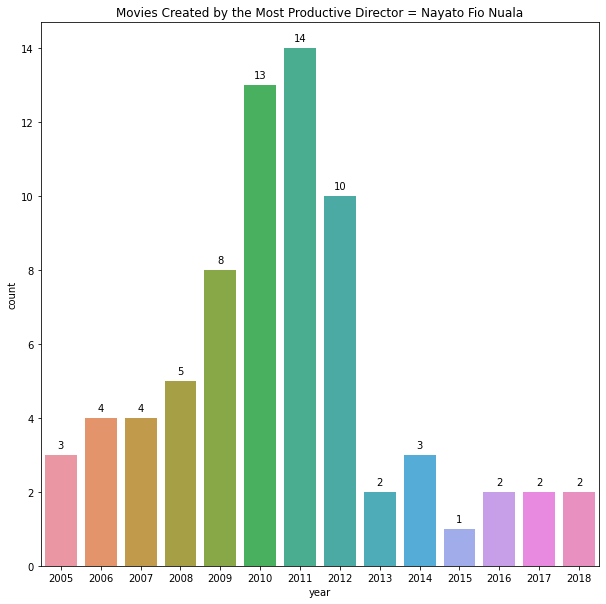

In [ ]:
plt.figure(figsize=(10,10))

data_x = df.year[df.director == 'Nayato Fio Nuala']
top_director_by_year = sns.countplot(x = data_x)

for i in top_director_by_year.patches:
  top_director_by_year.annotate(format(i.get_height()), (i.get_x() + i.get_width() / 2., i.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Movies Created by the Most Productive Director = Nayato Fio Nuala')

plt.show()

Lalu untuk melihat kualitas dari film Produksi Nayato, kita bisa melihat rating dari film-film tersebut. Dari grafik di bawah, terlihat distribusi seluruh rating dari film yang diproduksi oleh Nayato Fio Nuala.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


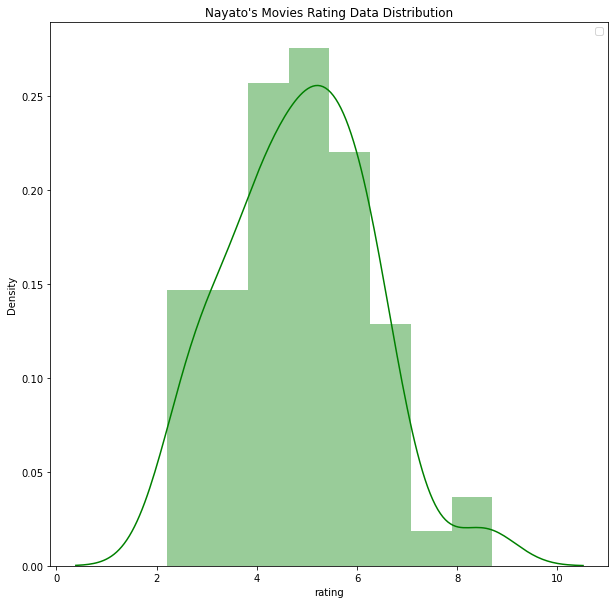

In [34]:
plt.figure(figsize=(10,10))

sns.distplot(df.rating[df.director == 'Nayato Fio Nuala'], color = 'g');

plt.title('Nayato\'s Movies Rating Data')

plt.legend();

# Hasil analisis data - Amirul Abdul Aziz

Dari dataframe di atas kita bisa melihat bahwa para sineas film di negara kita terbilang cukup produktif dalam membuat karya film. Namun kita juga ingin mengetahui kira-kira pada tahun berapa ya film Indonesia pertama dibuat dan tercatat dalam IMDB? 


Dari data di bawah ini terlihat bahwa Film Indonesia pertama yang tercatat di IMDB adalah film yang diproduksi dan diluncurkan pada tahun 1926. Sedangkan Film Indonesia terbaru yang tercatat pada IMDB adalah film yang diluncurkan pada tahun 2023 nanti. 

In [ ]:
# analisis tahun film
maxyear = df.year.max()
minyear = df.year.min()

print('max year:', maxyear)
print('min year:', minyear)

max year: 2023
min year: 1926


Dari sekian banyak film Indonesia yang diproduksi oleh para sineas, kemudian kita ingin mengetahui kira-kira bagaimana kualitas dari film Indonesia? Jika kita berbicara tentang kualitas, tentu saja kita mengarahkan pandangan ke kolom rating pada dataframe ini. Bagaimanakah perkembangan rating film Indonesia sejauh ini? 

Grafik di bawah ini mencatat jumlah distribusi rating film Indonesia. 
Dari grafik di bawah ini, kita bisa melihat bahwa rating film Indonesia sangat bervariasi mulai dari 1.2 hingga 9.8. 
Jumlah rating film Indonesia sebagian besar berada di range rating 5.8 hingga 7.8 dengan rating terbanyak adalah 6.2 sejumlah 60 film. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


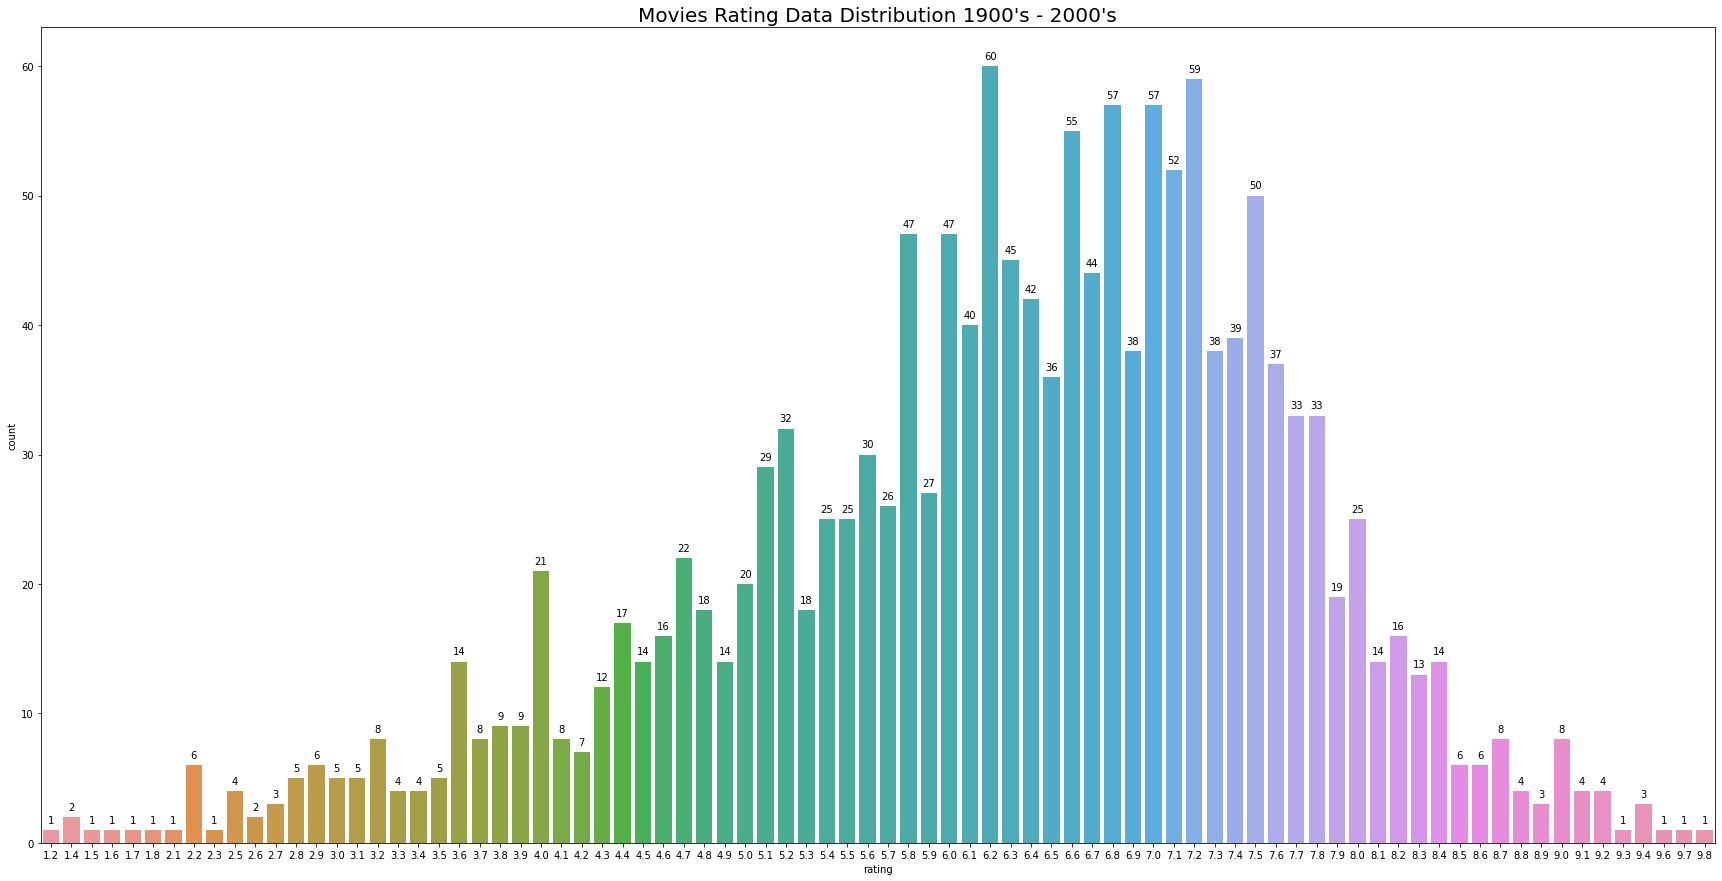

In [ ]:
# analisis kolom target data (rating)
plt.figure(figsize = (30, 15))

rating_plot = sns.countplot(df.rating)

for i in rating_plot.patches:
  rating_plot.annotate(format(i.get_height()), (i.get_x() + i.get_width() / 2., i.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Movies Rating Data Distribution 1900\'s - 2000\'s',fontsize=20)

plt.show()

Membicarakan mengenai kualitas, kita juga ingin mengetahui kira-kira film Indonesia apa saja yang memiliki rating tertinggi. Untuk itu kami sajikan data 10 Film Indonesia yang tercatat di IMDB dengan rating tertinggi. 

10 Film Indonesia ini kesemuanya memiliki rating di atas 9.0.

Di nomor 1 ada film Indonesia yang diproduksi tahun 2016 besutan Sutradara Bobby Zarkasih. Film berjudul "Adagium" ini memiliki rating 9.8.

Di nomor 10 ada Film Indonesia yang diproduksi tahun 2019 buatan Sutradara Scott Allen Nollen. Film ini berjudul "Five Indo Samurai" dan rating 9.2.

In [ ]:
df.nlargest(10, columns= 'rating')

,title,year,rating,director,stars,actor_1,actor_2,actor_3
2234,Adagium,2016,9.8,Bobby Zarkasih,"Kevin Agung,Pascal Esatama,Kemas Heryawan",Kevin Agung,Pascal Esatama,Kemas Heryawan
1642,Vlog Fest 2016,2016,9.7,Erix Soekamti,"Rintho Aribowo,Dondy Bappedyanto,Pang Bathoro",Rintho Aribowo,Dondy Bappedyanto,Pang Bathoro
1874,The Eyeless Beggar,2015,9.6,Jeiji Joned,"Didet Joned,Yanti Joned,Badrian Noviansyah",Didet Joned,Yanti Joned,Badrian Noviansyah
168,Indonesia Kirana,2016,9.4,Febian Nurrahman Saktinegara,"Dzulfiqar Abduljabbar,Ahira Amarillis,Larasati...",Dzulfiqar Abduljabbar,Ahira Amarillis,Larasati Dewi Harsono
1775,Cittaraga Dian Healing Dance,2016,9.4,Roby Eka,"Roby Eka,Roby Eka",Roby Eka,Roby Eka,None
2408,My Journey: Mencari Mata Air,2016,9.4,Joko Nugroho,"Btari Chinta,Christopher V. Warren,Cindy Celine",Btari Chinta,Christopher V. Warren,Cindy Celine
3071,Horas Amang: Tiga Bulan Untuk Selamanya,2019,9.3,Irham Acho Bahtiar,"Cok Simbara,Tanta Ginting,Novita Dewi",Cok Simbara,Tanta Ginting,Novita Dewi
1564,Adista,2018,9.2,N. Dilivio Adani,"N. Dilivio Adani,N. Dilivio Adani,Devi Marlinda",N. Dilivio Adani,N. Dilivio Adani,Devi Marlinda
1728,Papa Pulang,2018,9.2,Jeiji Joned,"Badrian Noviansyah,Marsha Bayu Andika Pusung,R...",Badrian Noviansyah,Marsha Bayu Andika Pusung,Rendy Septino
2303,Five Indo Samurai,2019,9.2,Scott Allen Nollen,"Arizkia Afrilio Amarulloh,Arviansyah Julio Ama...",Arizkia Afrilio Amarulloh,Arviansyah Julio Amarulloh,Ardi


Pada salah satu grafik, kita telah melihat bahwa sineas film Indonesia sangat produktif dalam hal pembuatan film. Sejak tahun 1926, film Indonesia telah tercatat di IMDB. 

Sekarang mari kita lihat perbandingan rating film Indonesia di Abad 20 (1900) vs film Indonesia di Abad 21 (2000-an).


Dari grafik di bawah, rating film Indonesia di Abad 21 meski dengan perbedaan tipis terlihat melampaui rating film Indonesia di Abad 20.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


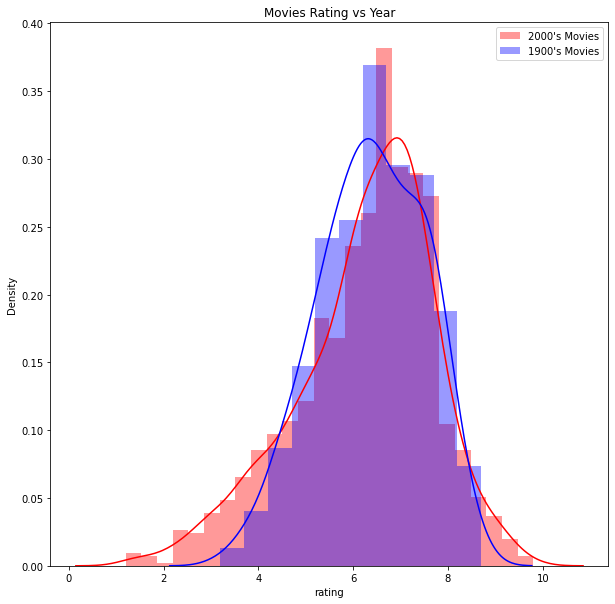

In [ ]:
# menampilkan plot film vs rating berdasarkan pembagian tahun

plt.figure(figsize=(10,10))

sns.distplot(df.rating[df.year > 2000], color = 'r', label = '2000\'s Movies');
sns.distplot(df.rating[df.year < 2000], color = 'b', label = '1900\'s Movies');

plt.title('Movies Rating vs Year')

plt.legend();